In [1]:
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random

In [2]:
#50 oraz 60
CATEGORIES = ["50", "60","A-1","A-2","A-3","A-4", "A-7","A-18b", "B-20", "B-42","C-5", "D-1","D-3", "D-42", "D-43"]
DATADIR = r"C:\Users\lenovo\Desktop\main-sign-classifier\data"
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.COLOR_BGR2RGB)

In [4]:
data = []
def fetch_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array, (28, 28))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                data.append([img_array, class_num])
            except Exception as e:
                pass
fetch_data()
random.shuffle(data)

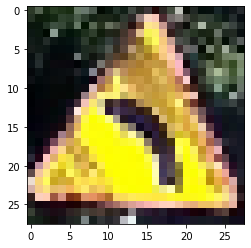

In [5]:
plt.imshow(data[116][0])
plt.show()

In [6]:
print(len(data))

2718


In [7]:
# split data into 2 arrays, one with images, and 2nd with labels
images = []
labels = []

for features, label in data:
    images.append(features)
    labels.append(label)
images = np.array(images).reshape(-1, 28, 28, 3)

In [8]:
#about 80% for training and 20% for testing

training_images = images[:2200]
training_labels = labels[:2200]
testing_images = images[2200:]
testing_labels = labels[2200:]

training_images = np.array(training_images)
training_labels = np.array(training_labels)
testing_images = np.array(testing_images)
testing_labels = np.array(testing_labels)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=8, validation_data=(testing_images, testing_labels))


Epoch 1/8
69/69 [==============================] - 2s 22ms/step - loss: 3.5621 - accuracy: 0.4123 - val_loss: 0.9017 - val_accuracy: 0.6931
Epoch 2/8
69/69 [==============================] - 1s 20ms/step - loss: 0.6540 - accuracy: 0.7868 - val_loss: 0.4466 - val_accuracy: 0.8610
Epoch 3/8
69/69 [==============================] - 1s 20ms/step - loss: 0.3096 - accuracy: 0.9041 - val_loss: 0.3404 - val_accuracy: 0.8880
Epoch 4/8
69/69 [==============================] - 1s 20ms/step - loss: 0.1979 - accuracy: 0.9400 - val_loss: 0.2932 - val_accuracy: 0.9228
Epoch 5/8
69/69 [==============================] - 1s 21ms/step - loss: 0.1681 - accuracy: 0.9468 - val_loss: 0.2533 - val_accuracy: 0.9286
Epoch 6/8
69/69 [==============================] - 1s 21ms/step - loss: 0.1478 - accuracy: 0.9550 - val_loss: 0.2927 - val_accuracy: 0.9344
Epoch 7/8
69/69 [==============================] - 1s 21ms/step - loss: 0.0857 - accuracy: 0.9786 - val_loss: 0.1703 - val_accuracy: 0.9614
Epoch 8/8
69/69 [===

In [13]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"accuracy:{accuracy}")
print(f"loss:{loss}")

model.save("sign_classifier.model")

17/17 [==============================] - 0s 7ms/step - loss: 0.2315 - accuracy: 0.9440
accuracy:0.9440154433250427
loss:0.23145529627799988
INFO:tensorflow:Assets written to: sign_classifier.model\assets


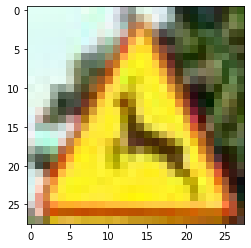

7
predicition is A-18b


In [14]:
img_zwierz2 = cv2.imread(r"C:\Users\lenovo\Desktop\limit-speed-classifier\fast_test_data\zwierz2.png")

img_zwierz2 = cv2.resize(img_zwierz2, (28, 28))
img_zwierz2 = cv2.cvtColor(img_zwierz2, cv2.COLOR_BGR2RGB)


plt.imshow(img_zwierz2)
plt.show()


prediction = model.predict(np.array([img_zwierz2]))
index = np.argmax(prediction)
print(index)
print(f'predicition is {CATEGORIES[index]}')
